In [1]:
import pandas as pd
import os, inspect, glob, sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import epri_mc_lib as mc
from importlib import reload
reload(mc)

<module 'epri_mc_lib' from '/home/nick/Bureau/Programming/S2DS/Oct20_EPRI/Task1/NB/epri_mc_lib.py'>

In [2]:
merged_tube = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/TUBE_merge_1.csv'),
                  index_col=0)
merged_pipe = pipe = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/PIPE_merge_1.csv'),
                  index_col=0)
merged_tube = merged_tube.drop(columns=mc.drop_list_tube_std+mc.drop_list_absorption_500_200+['mean_MBN','mean_perm','mean_CF'])
merged_pipe = merged_pipe.drop(columns=['Absorption_avg_100','Absorption_std_100'])

In [3]:
scaler = StandardScaler()
scaled_tube = pd.DataFrame(scaler.fit_transform(merged_tube))
scaled_tube.columns = merged_tube.columns
scaled_tube.index = merged_tube.index

In [4]:
pca = PCA(n_components=0.9, svd_solver='full')
pca.fit(scaled_tube)


PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

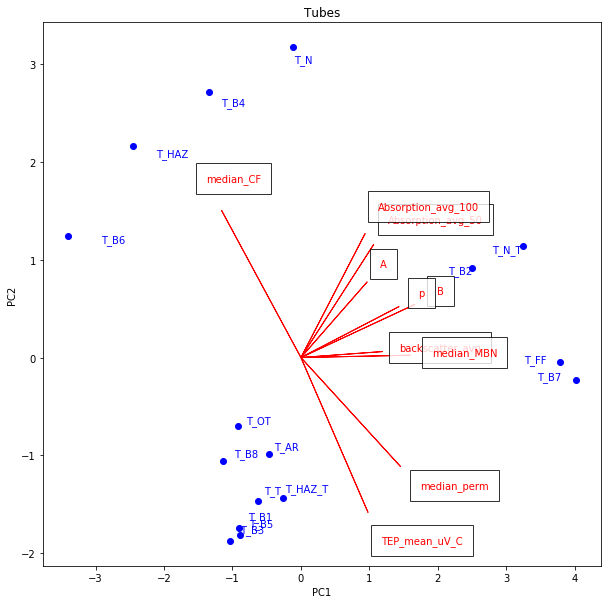

In [5]:
mc.biplot(pca, scaled_tube, 0,1, "Tubes")

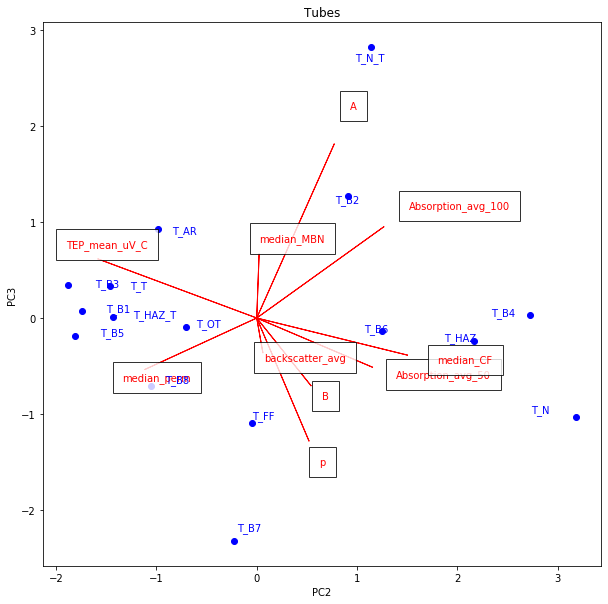

In [6]:
mc.biplot(pca, scaled_tube, 1,2, "Tubes")

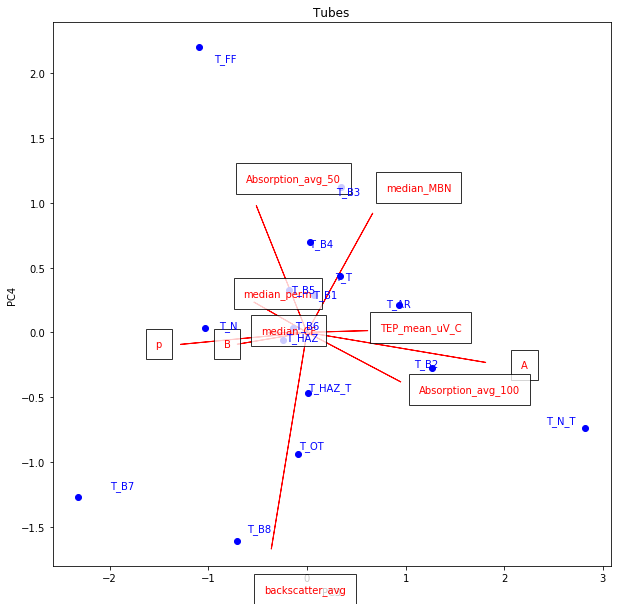

In [7]:
mc.biplot(pca, scaled_tube, 2,3, "Tubes")

In [8]:
scaler = StandardScaler()
scaled_pipe = pd.DataFrame(scaler.fit_transform(merged_pipe))
scaled_pipe.columns = merged_pipe.columns
scaled_pipe.index = merged_pipe.index

In [9]:
pca = PCA(n_components=0.9, svd_solver='full')
pca.fit(scaled_pipe)


PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

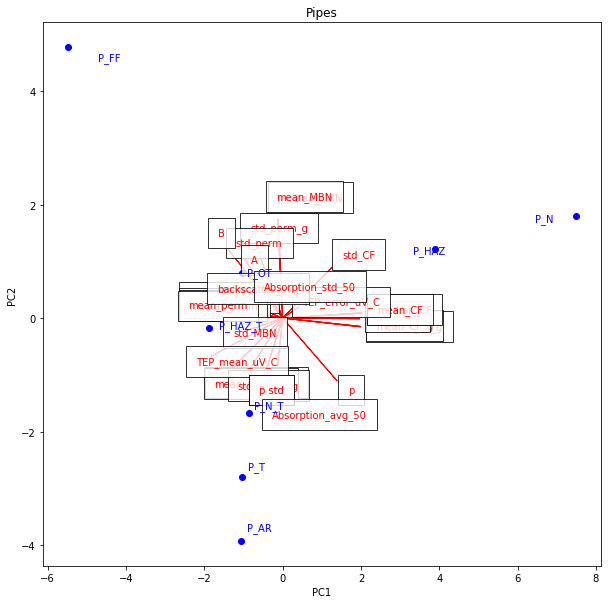

In [10]:
mc.biplot(pca, scaled_pipe, 0,1, "Pipes")

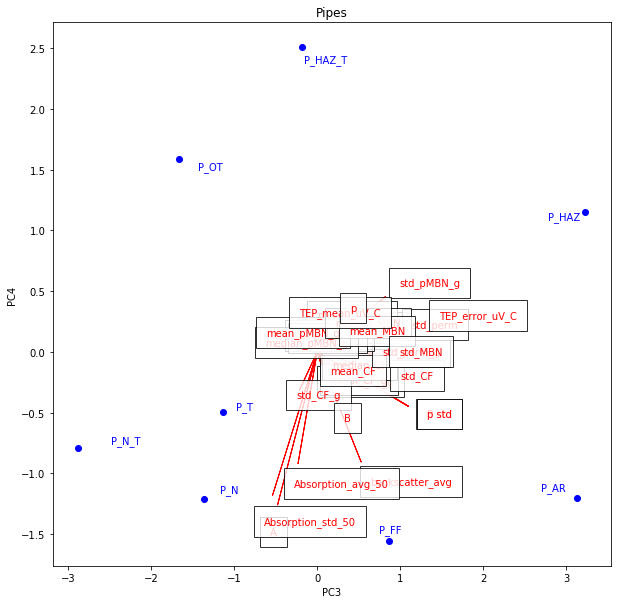

In [11]:
mc.biplot(pca, scaled_pipe, 2,3, "Pipes")